In [ ]:
import re
from collections import Counter

def words(text): return re.findall(r'\w+', text.lower())

WORDS = Counter(words(open('big.txt').read()))

def P(word, N=sum(WORDS.values())): 
    "Probability of `word`."
    return WORDS[word] / N

def correction(word): 
    "Most probable spelling correction for word."
    return max(candidates(word), key=P)

def candidates(word): 
    "Generate possible spelling corrections for word."
    return (known([word]) or known(edits1(word)) or known(edits2(word)) or [word])

def known(words): 
    "The subset of `words` that appear in the dictionary of WORDS."
    return set(w for w in words if w in WORDS)

def edits1(word):
    "All edits that are one edit away from `word`."
    letters    = 'abcdefghijklmnopqrstuvwxyz'
    splits     = [(word[:i], word[i:])    for i in range(len(word) + 1)]
    deletes    = [L + R[1:]               for L, R in splits if R]
    transposes = [L + R[1] + R[0] + R[2:] for L, R in splits if len(R)>1]
    replaces   = [L + c + R[1:]           for L, R in splits if R for c in letters]
    inserts    = [L + c + R               for L, R in splits for c in letters]
    return set(deletes + transposes + replaces + inserts)

def edits2(word): 
    "All edits that are two edits away from `word`."
    return (e2 for e1 in edits1(word) for e2 in edits1(e1))

In [ ]:
correction('Just infermation')
wordnet_Lemmatizer.lemmatize("infermation")


In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

In [1]:
import pandas as pd 

In [2]:
dataset = pd.read_csv('nigeria_security.csv')

In [3]:
import numpy as np

In [4]:
import nltk

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

In [6]:
##Add Textblob or Vader Algorithm for classification

In [7]:
dataset['result'] = ''

In [8]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [9]:
sid = SentimentIntensityAnalyzer()

In [10]:
from tqdm import tqdm

In [11]:
#loop through all that values in the csv
#to classify the vader tweets

#0 - Negative
#1 - Positive
#2 - Neutral

In [12]:
for i  in tqdm(range(0,len(dataset))):
    #Remove all other characters excepts for a-z 
    
    original_tweet = dataset.iloc[i]['Tweet']
    #correct_tweet = correction(original_tweet)
    #dataset.iloc[i]['Tweet'] = correct_tweet
    ss = sid.polarity_scores(original_tweet)
    
    
    if ss["compound"] == 0.0: 
        dataset['result'][i] = 2
    elif ss["compound"] > 0.0:
        dataset['result'][i] = 1
    else:
        dataset['result'][i] = 0

100%|██████████| 2702/2702 [00:02<00:00, 1088.11it/s]


In [24]:
import re
def remove_urls (vTEXT):
    vTEXT = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', vTEXT, flags=re.MULTILINE)
    return(vTEXT)

In [ ]:
import re
remove_urls(dataset.Tweet[0])


In [ ]:
# plot the bar chart
# to know the graphical sentiment 

In [ ]:
#Preprocess datasets

In [ ]:
import re

In [31]:
from nltk.stem import WordNetLemmatizer


In [30]:
from nltk.util import ngrams

In [27]:
stopword = "Not Available"

In [32]:
wordnet_Lemmatizer = WordNetLemmatizer()

In [34]:
corpus = []

In [35]:
from nltk.corpus import stopwords

stop_words = stopwords.words('english')

#loop through all that values in the csv
for i  in range(0,len(dataset)):
    
 
    tweet = dataset.iloc[i]['Tweet']
    tweet = remove_urls(tweet)
    tweet = re.sub('[^a-zA-Z]', ' ' , tweet)
    
   
    
    #tweet = re.sub(r'http\S+', '', tweet)
    
    #Change all tweets to lower case
    tweet = tweet.lower()

    tweet = nltk.word_tokenize(tweet)
    
    
    if stopword != "Available" : 
        #remove stop words
        tweet = [word for word in tweet if word not in stop_words]

    
    tweet_lemma = tweet
    
    # get lematized word
    tweet_lemma = [wordnet_Lemmatizer.lemmatize(word) for word in tweet_lemma]
   
    #add each cleaned tweets to our corpus
    corpus.append(' '.join(tweet_lemma))



In [ ]:
show_wordcloud(corpus)

In [ ]:
import csv

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
from sklearn.metrics import precision_recall_fscore_support as score

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:

with open('sw_not_available_NlP_Result.csv', 'w') as fp :
    writer = csv.writer(fp, delimiter=',')
    writer.writerow(["Kbest","Feature Extraction","Classifier","Accuracy","Precsion", "Recall", "FScores", "gram", "stopword"])  # write header
    
    
    #doc2vec vs Bag of word
    #======================== BAG OF WORDS MODEL : COUNT VECTORIZER ===================================
    #Count Vectorizer  with different classifeir algorithm    
    #Create our bag of word Model for count vectorizer
    
        
    #total_bag_of_words_model = ["CountVectorizer","TfidfTransformer","TfidfVectorizer","HashingVectorizer","chi2"]
    total_bag_of_words_model = ["TfidfVectorizer"]

    for gram_type in range(1,4) :

        for bag_of_word_model in total_bag_of_words_model :


            if bag_of_word_model == "CountVectorizer" :
                bag_of_words = CountVectorizer(ngram_range=(gram_type, gram_type))


            if bag_of_word_model == "TfidfVectorizer" :
                bag_of_words = TfidfVectorizer(ngram_range=(gram_type, gram_type))


            #Bag of word is matrix
            X = bag_of_words.fit_transform(corpus).toarray()
            #y = dataset.iloc[:, 1].values
            y = dataset.result
            y= y.astype('int') 



            total_classifier = ["GaussianNB","SDGClassifier"]

            for classifier_name in total_classifier:



                print("")

                if classifier_name == "GaussianNB" :
                    from sklearn.naive_bayes import GaussianNB
                    classifier = GaussianNB()

                if classifier_name == "SDGClassifier" :
                    from sklearn.linear_model import SGDClassifier
                    classifier = SGDClassifier()

                if classifier_name == "LogisticRegression" :
                    from sklearn.linear_model import LogisticRegression
                    classifier = LogisticRegression()

                if classifier_name == "RandomForestClassifier" :
                    from sklearn.ensemble import RandomForestClassifier
                    classifier = RandomForestClassifier()


                #Dimension Reductionality
                #Using CH2 as parameter for selecting KBest   

                list = [10,50,100,500,1000,1500,2000,2500,3000,3500,4000,4500,5283]

                for knum in list:




                    X_new = SelectKBest(chi2, k=knum).fit_transform(X, y)

                    #split data into test and train
                    from sklearn.cross_validation import train_test_split
                    X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.20, random_state = 0)


                    classifier.fit(X_train, y_train)
                    y_pred = classifier.predict(X_test)

                    #Making the confusion Matrix
                    cm = confusion_matrix(y_test, y_pred)

                    accuracy = (cm[0][0] + cm[1][1]) / len(y_test)

                    precision, recall, fscore, support = score(y_test, y_pred, average='weighted')
                    
                    accuracy = float(str(accuracy)[:6])
                    precision = float(str(precision)[:6])
                    recall = float(str(recall)[:6])
                    fscore = float(str(fscore)[:6])

                    writer.writerow([knum,bag_of_word_model, classifier_name,accuracy, precision, recall, fscore, gram_type, stopword])  # write header


            #print("done")

    #csv_columns = ['Kbest','SVC','RandomForestClassifier','GaussianNB', 'SDGClassifier', 'LogisticRegression',  'KNeighborsClassifier' , 'DecisionTreeClassifier', 'Feature Extraction', 'stopword removal', 'wsd']
    #WriteDictToCSV("Nlp_result_output.csv",csv_columns,dict_data_csv)

print("Sentiment Analysis Done")

In [ ]:
#Plot result in chart

[Text(0,0.5,'Result'), Text(0.5,0,'KBest(Chi2)')]

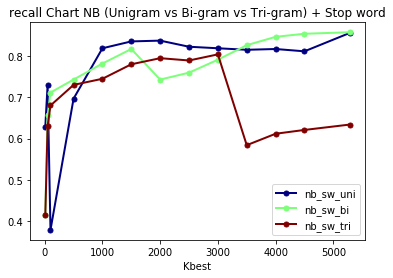

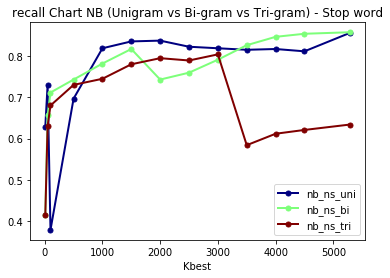

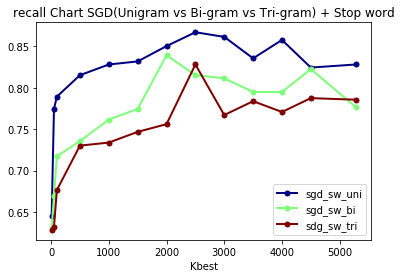

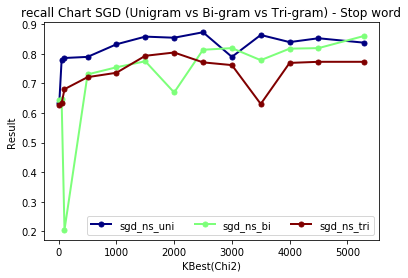

In [26]:

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

dataset_chart = pd.read_csv('gr/recall - result - graph.csv')
#dataset = dataset[dataset['FS'] == 'CountVectorizer']
#dataset = dataset[dataset['FS'] == 'TFIDF']

#ax = dataset_chart.plot(x='Kbest', y= ['nb_sw_uni','sgd_sw_uni', 'nb_sw_bi', 'sgd_sw_bi','nb_ns_uni','sgd_ns_uni','nb_ns_bi','sgd_ns_bi'], style='',colormap='jet', lw=2, marker='.',markersize=10,title='TF-IDF')
#ax = dataset_chart.plot(x='Kbest', y= ['nb_sw_uni','sgd_sw_uni', 'nb_sw_bi', 'sgd_sw_bi','nb_ns_uni','sgd_ns_uni','nb_ns_bi','sgd_ns_bi','nb_sw_tri', 'sdg_sw_tri' , 'nb_ns_tri', 'sgd_ns_tri'], style='',colormap='jet', lw=2, marker='.',markersize=10,title='TF-IDF')

ax = dataset_chart.plot(x='Kbest', y= ['nb_sw_uni', 'nb_sw_bi','nb_sw_tri'], style='',colormap='jet', lw=2, marker='.',markersize=10,title='recall Chart NB (Unigram vs Bi-gram vs Tri-gram) + Stop word')
ax = dataset_chart.plot(x='Kbest', y= ['nb_ns_uni', 'nb_ns_bi','nb_ns_tri'], style='',colormap='jet', lw=2, marker='.',markersize=10,title='recall Chart NB (Unigram vs Bi-gram vs Tri-gram) - Stop word')
ax = dataset_chart.plot(x='Kbest', y= ['sgd_sw_uni','sgd_sw_bi','sdg_sw_tri'], style='',colormap='jet', lw=2, marker='.',markersize=10,title='recall Chart SGD(Unigram vs Bi-gram vs Tri-gram) + Stop word')
ax = dataset_chart.plot(x='Kbest', y= ['sgd_ns_uni', 'sgd_ns_bi','sgd_ns_tri'], style='',colormap='jet', lw=2, marker='.',markersize=10,title='recall Chart SGD (Unigram vs Bi-gram vs Tri-gram) - Stop word')


#dataset.plot(x='KBest', y= ['GaussianNB'], style='')

#ax.set_xticklabels(('10','50','100','500','1000','1500','2000','2500','3000','3500','4000','4500','5283'))
ax.legend(ncol=3)
ax.set(xlabel='KBest(Chi2)', ylabel='Result')


In [1]:
# Legend & Key
# nb_sw_uni  = Naive Bayes Classifier + Stop word + Unigram 
# sgd_sw_uni = Stochastic Gradient Decent Classifier + Stop word + Unigram 
# nb_sw_bi   = Naive Bayes Classifier + Stop word + Bi-gram 
# sgd_sw_bi  = Stochastic Gradient Decent Classifier + Stop word + Bi-gram 
# nb_ns_uni  = Naive Bayes Classifier + Stop word - Unigram 
# sgd_ns_uni = Stochastic Gradient Decent Classifier - Stop word + Unigram 
# nb_ns_bi   = Naive Bayes Classifier - Stop word + Bi-gram 
# sgd_ns_bi  = Stochastic Gradient Decent Classifier - Stop word + Bi-gram 
# nb_ns_tri  = Naive Bayes Classifier - Stop word + tri-gram 
# sgd_ns_tri = Stochastic Gradient Decent Classifier - Stop word + Bi-gram 
# nb_sw_tri  = Naive Bayes Classifier - Stop word + tri-gram 
# sdg_sw_tri = Stochastic Gradient Decent Classifier + Stop word + tri-gram 

[Text(0,0,'Negative'), Text(0,0,'Positive'), Text(0,0,'Neutral')]

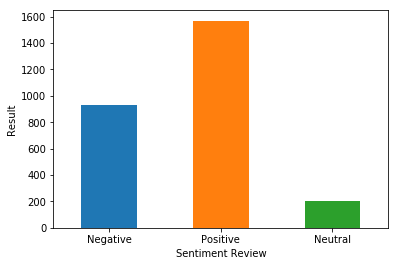

In [21]:
# plot the vader bar chart
df_chart = dataset 
f = pd.DataFrame()
f['class'] = df_chart.result.unique()
f['total'] = df_chart.groupby(['result'])['result'].agg('count')

ax = f.plot.bar(x='class', y='total', rot=0, legend = False)
ax.set(xlabel='Sentiment Review', ylabel='Result')
ax.set_xticklabels(['Negative','Positive', 'Neutral'])



In [ ]:
#plot most appearing features to graph

herdsman 0.2852880238388919
attack 0.32673911676172684
enugu 0.46488447710986147
community 0.3614604253566849
machete 0.5691698456268802
security 0.15320649754563606
guard 0.3345127817185372
nigeria 0.0758665386116976


AttributeError: 'DataFrame' object has no attribute 'xlabel'

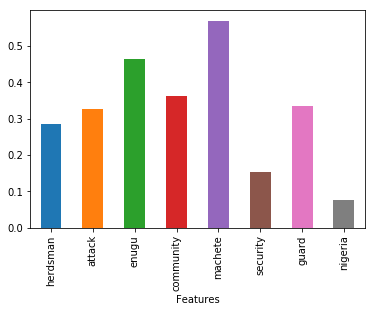

In [39]:
bow = TfidfVectorizer()
X = bow.fit_transform(corpus)
feature_names = bow.get_feature_names()

doc = 0
feature_index = X[doc,:].nonzero()[1]
tfidf_scores = zip(feature_index, [X[doc, x] for x in feature_index])

score = []
word = []
for w, s in [(feature_names[i], s) for (i, s) in tfidf_scores]:
    print(w, s)
    x = score.append(s)
    y = word.append(w)

scores = pd.DataFrame({'Features' : word, 'score' : score})

scores.plot.bar(x='Features', y='score', legend = False, rot=90)
scores.xlabel(x, rotation=90)
scores.set(xlabel='Tokens', ylabel='Weighted Scores')

